In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
data = pd.read_csv("disney_sample_data.csv")
df = pd.DataFrame(data)

In [6]:
df.head()

,Unnamed: 0,created_date,url,title,language,author_name,content,language.1,host,host_traffic,...,intent,lemmas,shares_count,likes_count,hashtags,comments_count,emoticons,country,ave,reach
0,0,2023-10-05 22:00:01,https://www.disney.pl/marvel-w-disney-plus,"Marvel w Disney+: filmy, seriale, daty premier...",pl,NaN,"*Obowiązuje regulamin | 28,99zł/miesiąc lub 28...",pl,disney.pl,349162.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27091,57383
1,1,2023-10-25 19:40:51,https://satkurier.pl/news/232301/el-clsico-na-...,El Clásico na Estadi Olímpic w Eleven Sports 1 4K,pl,NaN,sezon w Disney+ [wideo] Rajd Europy Centralnej...,pl,satkurier.pl,1724917.0,...,UNDEFINED,"['sezon', 'wideo', 'rajd', 'europa', 'centraln...",NaN,NaN,NaN,NaN,NaN,NaN,22267,57305
2,2,2023-10-19 17:46:02,https://malowazne.wordpress.com/2023/10/19/klo...,Kłopotliwy czas i bajki,pl,NaN,"Korzystając z dostępu do Disney+, obejrzałam w...",pl,malowazne.wordpress.com,0.0,...,UNDEFINED,"['korzystając', 'dostęp', 'obejrzeć', 'być', '...",NaN,NaN,NaN,NaN,NaN,NaN,5516,117086
3,3,2023-10-24 14:49:35,http://screenlovers.pl/swiat-odpremiumizowany-...,"Świat odpremiumizowany, czyli co w serialach p...",pl,NaN,Sytuację w serialach można podsumować krótko: ...,pl,screenlovers.pl,6813.0,...,INFORMATIONAL,"['dostępny', 'krótki', 'okno', 'tańszy', 'mode...",NaN,NaN,NaN,NaN,NaN,NaN,2475,21828
4,4,2023-10-25 15:48:29,https://nasz.orange.pl/t5/Telewizja/Problem-z-...,Problem z Dekoderem 4K Stream,pl,NaN,"Na Disney + i Skyshowtime zdarzają się 0,5-1 s...",pl,nasz.orange.pl,418719.0,...,UNDEFINED,"['skyshowtime', 'zdarzać', 'sekundowy', 'przyc...",NaN,NaN,NaN,NaN,NaN,NaN,83727,237378


In [7]:
# jakie są najczęstsze języki?

# tworzę nowy df 'languages' z językami i ilością ich wystąpień i wypisuję wynik
languages = df['language'].value_counts().reset_index()
print(languages)

   language  count
0        pl   4714
1        en     36
2        de      4
3        sr      4
4        fr      2
5        cs      2
6        sl      1
7        hu      1
8        es      1
9        hr      1
10       it      1
11       eo      1
12       zh      1


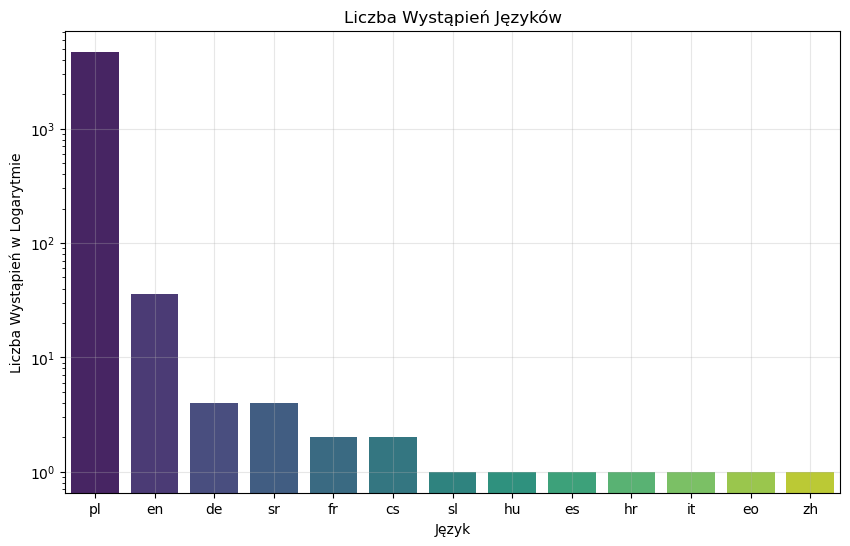

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=languages, x='language', y='count', palette='viridis')
plt.title('Liczba Wystąpień Języków')
plt.xlabel('Język')
plt.ylabel('Liczba Wystąpień w Logarytmie')
plt.yscale('log') # zmieniam oś y na skalę logarytmiczną dla lepszej wizualizacji
plt.grid(alpha=0.3)
# plt.savefig('wykres_1.jpg')

plt.show()

In [182]:
# które kraje mają największy zasięg?

# grupuję dane w df według kolumny 'country' i sumuje wartości z kolumny 'reach' w każdej grupie
# następnie używam reset_index(), aby zresetować indeksy grupy i uzyskać wynikowy DataFrame countries 
countries = df.groupby('country')['reach'].sum().reset_index()
countries = countries.sort_values(by='reach', ascending=False)
print(countries)

  country    reach
5      PL  8412642
2      GB   701253
6      US   647286
3      MX   207559
1      FR   180164
0      CA   179450
4      NL    13015


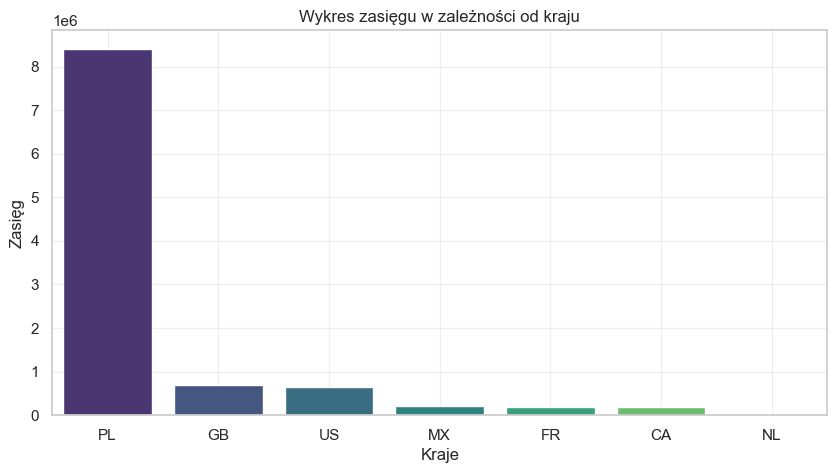

In [183]:
plt.figure(figsize=(10, 5))
sns.barplot(data=countries, x='country', y='reach', palette='viridis')
plt.title('Wykres Zasięgu w Zależności od Kraju')
plt.xlabel('Kraje')
plt.ylabel('Zasięg')
plt.grid(alpha=0.3)
# plt.savefig('wykres_2.jpg')

plt.show()

In [189]:
# jakie źródła zapewniają największy zwrot z inwestycji marketingowych?

# grupuję df według kolumny 'host' i przypisuję średnią wartość z kolumny 'ave' w każdej grupie
hosts = df.groupby('host')['ave'].mean().reset_index()
# sortuję DataFrame hosts w kolejności malejącej na podstawie kolumny 'ave'
hosts = hosts.sort_values(by='ave', ascending=False)
# tworzę listę top_hosts, która zawiera nazwy 15 hostów z najwyższą sumą 'ave'
# modyfikuję DataFrame hosts w taki sposób aby wszystkie hosty, 
# których nazwa nie znajduje się na liście top_hosts, zostały zastąpione etykietą 'Inne'
top_hosts = hosts['host'].head(15).tolist()
hosts.loc[~hosts['host'].isin(top_hosts), 'host'] = 'Inne'
print(hosts.head(15))

                                  host      ave
235                      przewodnik.tv  99463.0
276          tarnobrzeg.naszemiasto.pl  98622.0
282                           telko.in  98586.0
55                     e-jarcar.com.pl  97956.0
93                 gloswielkopolski.pl  95693.0
206                           ossus.pl  95390.0
40                cyfrowypolsatnews.pl  94347.0
178                  muzyka.interia.pl  93870.0
128              kalisz.naszemiasto.pl  92826.0
162                         metale.org  91478.0
310                            xtb.com  88935.0
148  little-misss-naughty.blogspot.com  88863.0
202        ogrodzieniec.naszemiasto.pl  88748.0
258                  scroll.morele.net  88290.0
108                     hipackfill.com  88162.0


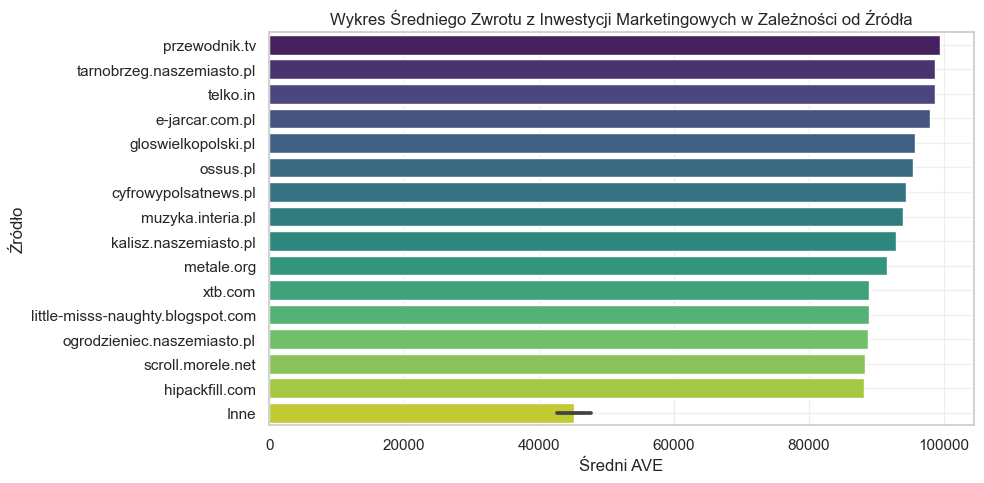

In [197]:
plt.figure(figsize=(10, 5))
sns.barplot(data=hosts, x='ave', y='host', palette='viridis')
plt.title('Wykres Średniego Zwrotu z Inwestycji Marketingowych w Zależności od Źródła')
plt.xlabel('Średni AVE')
plt.ylabel('Źródło')
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig('wykres_3.jpg')

plt.show()

In [202]:
# to samo dla sumy ave
hosts2 = df.groupby('host')['ave'].sum().reset_index()
hosts2 = hosts2.sort_values(by='ave', ascending=False)
top_hosts2 = hosts2['host'].head(15).tolist()
hosts2.loc[~hosts2['host'].isin(top_hosts2), 'host'] = 'Inne'
print(hosts2.head(15))

                  host       ave
253       samagame.com  59288016
291        twitter.com  41496190
65        facebook.com  28483674
116      instagram.com  14034967
254      samagamer.com  13453042
293          upflix.pl   5515400
107     hdtvpolska.com   4570258
183       naekranie.pl   4156104
74      filmozercy.com   3972320
284         tiktok.com   2684241
305  wirtualnemedia.pl   2660371
259       serialowa.pl   2459404
248       rtvmaniak.pl   2451962
45         dailyweb.pl   2329023
73      filmomaniak.pl   1975668


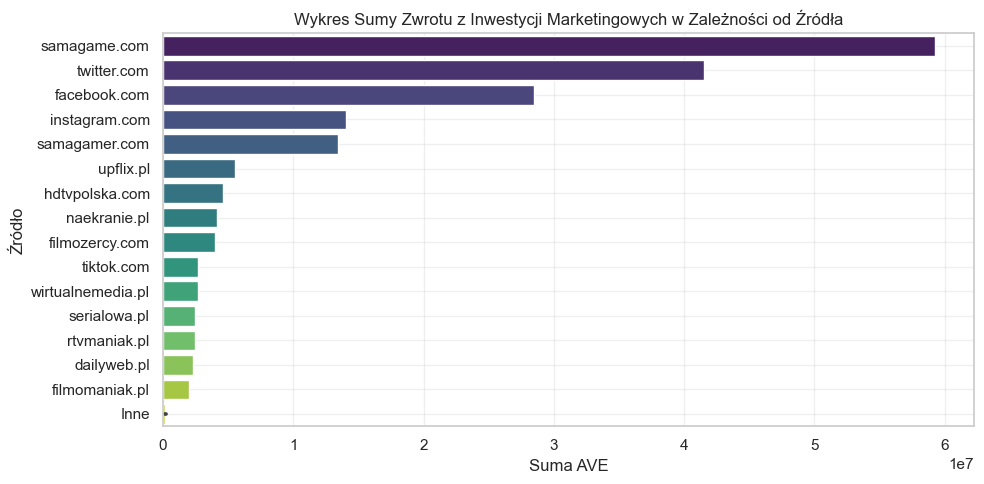

In [204]:
plt.figure(figsize=(10, 5))
sns.barplot(data=hosts2, x='ave', y='host', palette='viridis')
plt.title('Wykres Sumy Zwrotu z Inwestycji Marketingowych w Zależności od Źródła')
plt.xlabel('Suma AVE')
plt.ylabel('Źródło')
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig('wykres_3.jpg')

plt.show()

In [94]:
# wyrysuj wykres sentymentu w czasie. 
# Dla dni z największymi wartościami negatywnego sentymentu spróbuj określic, co się wtedy wydarzyło?

# tworzę nową kolumnę DataFrame 'date', która zawiera tylko daty (bez czasu) z kolumny 'created_date'
# następnie przekształcam wartości ze str do formatu daty 
df['date'] = df['created_date'].apply(lambda x: x.split(' ')[0])
df['date'] = pd.to_datetime(df['date'])

In [96]:
# przekształcam wartości sentymentu ze słownych na liczbowe na potrzeby wizualizacji
dmap = {'neutral':0, 'positive':1, 'negative':-1}
df['sentiment'] = df['sentiment'].map(dmap)

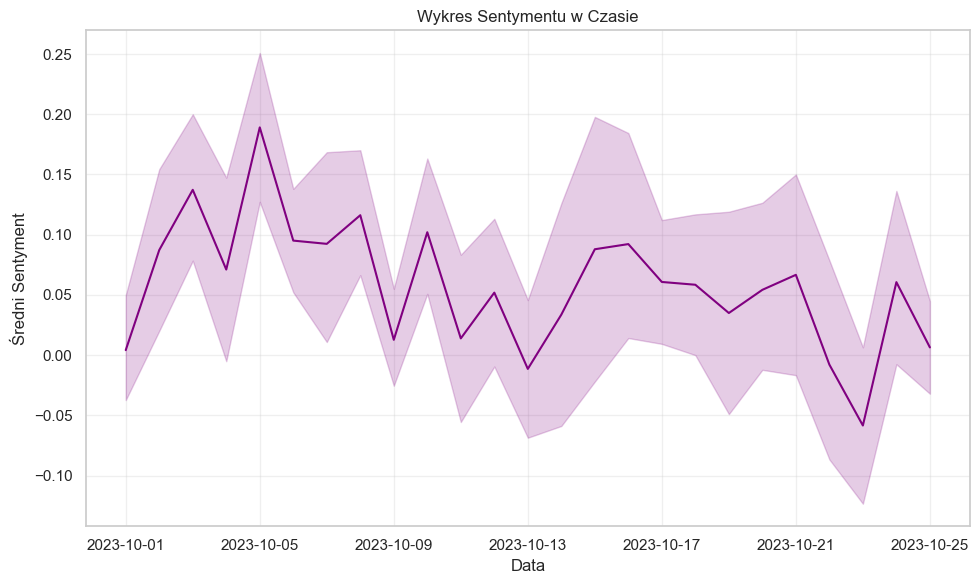

In [212]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='sentiment', color='purple')
plt.title('Wykres Sentymentu w Czasie')
plt.xlabel('Data')
plt.ylabel('Średni Sentyment')
plt.grid(alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
# plt.savefig('wykres_4.jpg')

plt.show()